In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [2]:
tickers = ['AAPL', 'MSFT', 'JPM' ]
raw= yf.download(
    tickers,
    start='2020-01-01',
    end='2025-06-27',
    auto_adjust=True,    # split/divided-adjusted close 
    progress=False
    )

print('column index:', raw.columns)
raw.head()

column index: MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'JPM'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High',  'JPM'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low',  'JPM'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open',  'JPM'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume',  'JPM'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


Price           Close                               High              \
Ticker           AAPL         JPM        MSFT       AAPL         JPM   
Date                                                                   
2020-01-02  72.620842  120.733566  153.042252  72.681289  120.742132   
2020-01-03  71.914810  119.140312  151.136642  72.676439  119.906792   
2020-01-06  72.487862  119.045601  151.527313  72.526549  119.080057   
2020-01-07  72.146935  117.021759  150.145721  72.753816  118.726959   
2020-01-08  73.307518  117.934631  152.537308  73.609752  118.485808   

Price                         Low                               Open  \
Ticker            MSFT       AAPL         JPM        MSFT       AAPL   
Date                                                                   
2020-01-02  153.147063  71.373218  119.167597  150.860296  71.627092   
2020-01-03  152.403898  71.689950  118.055188  150.603064  71.847110   
2020-01-06  151.594018  70.783263  117.555704  149.126197  71.034724   
2020-01-07  152.137116  71.926907  116.970088  149.897993  72.497522   
2020-01-08  153.213818  71.849540  116.780608  150.498269  71.849540   

Price                                  Volume                      
Ticker             JPM        MSFT       AAPL       JPM      MSFT  
Date                                                               
2020-01-02  119.621127  151.289063  135480400  10803700  22622100  
2020-01-03  118.416896  150.850807  146322800  10386800  21116200  
2020-01-06  117.607375  149.669313  118387200  10259000  20813700  
2020-01-07  118.227453  151.803637  108872000  10531300  21634100  
2020-01-08  116.866721  151.432030  132079200   9695300  27746500

In [3]:
# isolate daily close prices for each ticker 
data = raw.xs('Close', level='Price', axis=1)
data.head()

Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-02,72.620842,120.733566,153.042252
2020-01-03,71.914810,119.140312,151.136642
2020-01-06,72.487862,119.045601,151.527313
2020-01-07,72.146935,117.021759,150.145721
2020-01-08,73.307518,117.934631,152.537308


In [4]:
# peek at first and last rows 
display(data.head(1))
display(data.tail())

#check for missing values
print('Any NaNs? ->', data.isna().values.any())

Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-02,72.620842,120.733566,153.042252


Ticker,AAPL,JPM,MSFT
Date,,,
2025-06-20,201.000000,275.000000,477.399994
2025-06-23,201.500000,278.269989,486.000000
2025-06-24,200.300003,281.260010,490.109985
2025-06-25,201.559998,284.059998,492.269989
2025-06-26,201.000000,288.750000,497.450012


Any NaNs? -> False


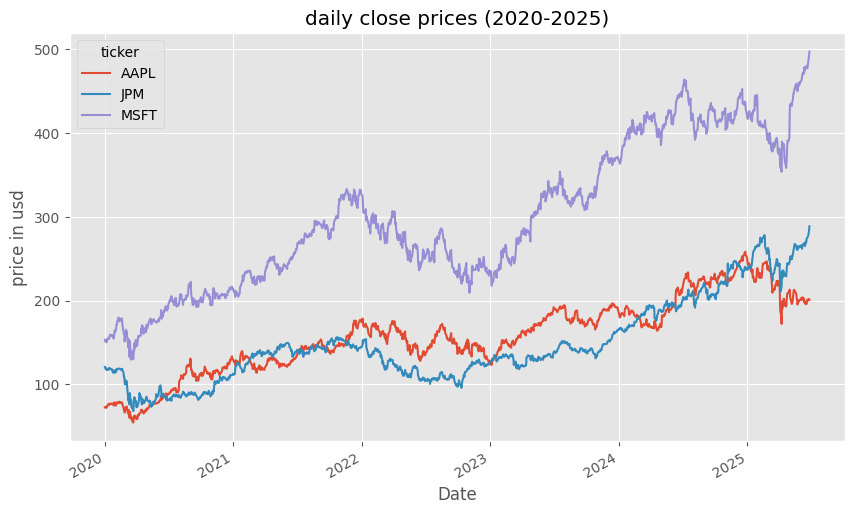

In [5]:
# visualize the price evaluation 
plt.figure(figsize=(10,6))
data.plot(ax=plt.gca())
plt.title('daily close prices (2020-2025)')
plt.ylabel('price in usd')
plt.xlabel('Date')
plt.legend(title='ticker')
plt.show()

In [6]:
# daily pct returns
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-03,-0.009722,-0.013196,-0.012452
2020-01-06,0.007968,-0.000795,0.002585
2020-01-07,-0.004703,-0.017001,-0.009118
2020-01-08,0.016086,0.007801,0.015928
2020-01-09,0.021241,0.003651,0.012493


In [7]:
# qucik stats 
stats = (
    returns.agg(['mean', 'std', 'min', 'max']).T.rename(columns={'mean': 'Daily Mean return', 'std': 'Daily Volatility'})
)
stats

,Daily Mean return,Daily Volatility,min,max
Ticker,,,,
AAPL,0.000950,0.020550,-0.128647,0.153288
JPM,0.000839,0.020326,-0.149649,0.180125
MSFT,0.001040,0.019175,-0.147390,0.142169


<Axes: title={'center': 'yearly volatility'}, xlabel='year', ylabel='volatility'>

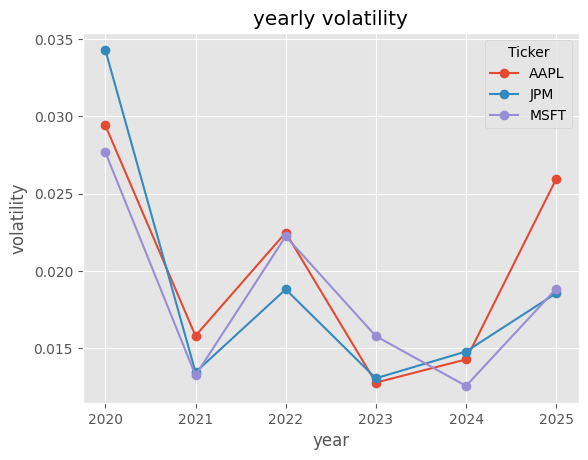

In [8]:
# volatility year by year
returns.groupby(returns.index.year).std().plot(
    #figsize=(10,6),
    title= 'yearly volatility',
    ylabel='volatility',
    xlabel='year',
    marker='o'
    
)

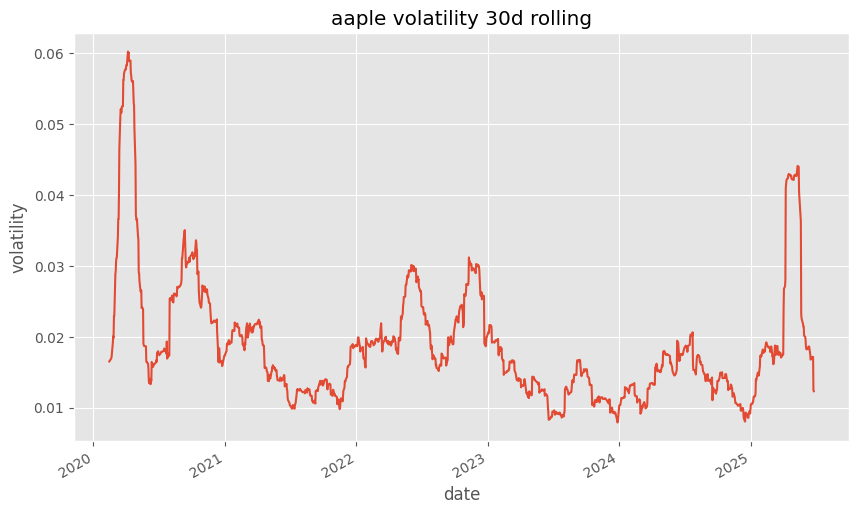

In [9]:
#ROLLING VOLATITLY FO AAPL
aapl_30d_vol = returns['AAPL'].rolling(30).std()
plt.figure(figsize=(10,6))
aapl_30d_vol.plot()
plt.title("aaple volatility 30d rolling")
plt.ylabel('volatility')
plt.xlabel('date')
plt.show()


In [10]:
# save to disk for sql/modling 
data.to_parquet('data/01_EDA_stock/close_prices.paraquet')
returns.to_parquet('data/01_EDA_stock/daily_returns.parquet')
print('saved parquet files')

OSError: Cannot save file into a non-existent directory: 'data\01_EDA_stock'

In [11]:
import os
os.chdir("/FIN-AI-BEAST")  # Set to your project root

# -----------------------
# 🗃️ Day 3: SQLite Database + SQL Analysis
# -----------------------

In [12]:
import os
from sqlalchemy import create_engine

# Set project root explicitly (parent of notebooks folder)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
db_path = os.path.join(project_root, 'fin-ai.db')

# Ensure the directory exists (should always exist for project root, but safe to check)
os.makedirs(project_root, exist_ok=True)

# Use f-string for the engine URLdel "{db_path}"
engine = create_engine(f"sqlite:///{db_path}")

print("Database will be created at:", db_path)

Database will be created at: d:\fin-ai.db


In [14]:

prices_df = pd.read_parquet('data/01_EDA_stock/close_prices.paraquet')
retruns_df = pd.read_parquet('data/01_EDA_stock/daily_returns.parquet')

#quick check 
prices_df.head()


Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-02,72.620842,120.733543,153.042297
2020-01-03,71.914833,119.140327,151.136642
2020-01-06,72.487862,119.045601,151.527298
2020-01-07,72.146957,117.021736,150.145721
2020-01-08,73.307503,117.934608,152.537338


In [15]:
prices_df.to_sql('close_prices', con=engine, if_exists='replace', index=True)
retruns_df.to_sql('daily_returns', con=engine, if_exists='replace', index=True)

1377

In [16]:
pd.read_sql_query("PRAGMA table_info(daily_returns);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,DATETIME,0,None,0
1,1,AAPL,FLOAT,0,None,0
2,2,JPM,FLOAT,0,None,0
3,3,MSFT,FLOAT,0,None,0


In [17]:
# Get average daily return for each ticker
query = """
SELECT AVG([AAPL]) AS avg_AAPL,
       AVG([JPM]) AS avg_JPM,
       AVG([MSFT]) AS avg_MSFT
FROM daily_returns
"""
pd.read_sql_query(query, engine)

,avg_AAPL,avg_JPM,avg_MSFT
0,0.00095,0.000839,0.00104


In [18]:
# Top 3 most volatile stocks by std dev using pandas
volatility = retruns_df.std().sort_values(ascending=False)
top3 = volatility.head(3)
top3_df = top3.reset_index()
top3_df.columns = ['Ticker', 'std_dev']
top3_df


,Ticker,std_dev
0,AAPL,0.020550
1,JPM,0.020326
2,MSFT,0.019175


In [19]:
import yfinance as yf

sp500_raw = yf.download("^GSPC", start="2020-06-30", end="2025-06-30", progress=False)
print(sp500_raw.columns)
prices_df = raw['Close']  # or raw.xs('Close', level=0, axis=1)
returns_df = prices_df.pct_change().dropna()
returns_df.head()




C:\Users\it\AppData\Local\Temp\ipykernel_18932\3813639165.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_raw = yf.download("^GSPC", start="2020-06-30", end="2025-06-30", progress=False)


MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-03,-0.009722,-0.013196,-0.012452
2020-01-06,0.007968,-0.000795,0.002585
2020-01-07,-0.004703,-0.017001,-0.009118
2020-01-08,0.016086,0.007801,0.015928
2020-01-09,0.021241,0.003651,0.012493


In [20]:
if 'Adj Close' in sp500_raw.columns:
    sp500 = sp500_raw['Adj Close']
else:
    sp500 = sp500_raw['Close']  # fallback

sp500.name = 'S&P500'



In [21]:
market_returns = sp500.pct_change().dropna()
market_returns.name = 'Market_Return'


In [22]:
combined_returns = returns_df.join(market_returns, how='inner')
combined_returns.head()


Ticker,AAPL,JPM,MSFT,^GSPC
Date,,,,
2020-07-01,-0.001891,-0.008505,0.005848,0.005022
2020-07-02,0.000000,0.003248,0.007621,0.004541
2020-07-06,0.026750,0.025254,0.021526,0.015882
2020-07-07,-0.003103,-0.028210,-0.011628,-0.010819
2020-07-08,0.023290,0.010615,0.021993,0.007827


In [26]:
import statsmodels.api as sm
import pandas as pd

betas   = {}
alphas  = {}
summary = []

for ticker in ['AAPL', 'MSFT', 'JPM']:
    y = combined_returns[ticker]
    X = sm.add_constant(combined_returns['Market_Return'])  # adds α term
    model = sm.OLS(y, X).fit()
    
    alpha = model.params['const']
    beta  = model.params['Market_Return']
    
    alphas[ticker] = alpha
    betas[ticker]  = beta
    summary.append([ticker, round(alpha,5), round(beta,3), round(model.rsquared,3)])

pd.DataFrame(summary, columns=['Ticker','Alpha','Beta','R²'])


ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (d:\fin-ai-beast\fin-ai\Lib\site-packages\scipy\_lib\_util.py)